# **Project Name**    - Airbnb Booking Analysis



# **Project Summary -**

Airbnb, founded in 2008, is a global online marketplace for renting homes, apartments, or rooms, offering a diverse range of accommodations in over 220 countries. The "Airbnb Booking Analysis" project focuses on performing exploratory data analysis (EDA) on 2019 Airbnb data from New York City. This project involves cleaning and analyzing the data to uncover booking patterns and trends, with a focus on variables like price, location, and neighborhood.

The insights gained will help Airbnb hosts optimize their pricing, marketing, and listings, while also providing city officials with a better understanding of Airbnb's impact on the local economy and housing market. This analysis aims to generate valuable insights for various stakeholders in the Airbnb ecosystem.

# **GitHub Link -**

https://github.com/chenurimanga/ALMABETTER-CAPSTONE-PROJECT-2

# **Problem Statement**


The Airbnb Booking Analysis project aims to understand the dynamics of Airbnb bookings in New York City. The lack of understanding makes it difficult for hosts to optimize their pricing strategies and marketing efforts, and for city officials and regulators to develop effective policies. The project will use EDA techniques to analyze Airbnb data from 2019, providing valuable insights into the factors that influence Airbnb bookings in the city. The insights gained will be useful for hosts, city officials, and regulators in developing strategies and policies that benefit all stakeholders.

#### **Define Your Business Objective?**

The objective of this project is so provide valuable insights from the data to create a positive impact for Airbnb, it's hosts and the city officials. Also to learn from negative insights to take measures to benifit all stakeholders.

With this data we're looking to find answers to these questions:

1. Total rooms in all neighbourhood groups.
2. Total number of rooms for each room type.
3. Distribution of room availability in a year.
4. Price Distribution of rooms around the city.
5. Reviews distribution of rooms around the city.
6. Top 10 reviewed hosts based on reviews per month.
7. Price vs Room type for all neighbourhood groups.
8. Average number of nights people stay in each room.
9. Top neighbourhoods based on average price per day.
10. Average price of each room in all neighbourhood groups.
11. Relationship between locations and neighbourhood groups.
12. Relationship between locations and room type.
13. Relationship between locations and price.

# ***Let's Begin !***

## ***1. Know Your Data***

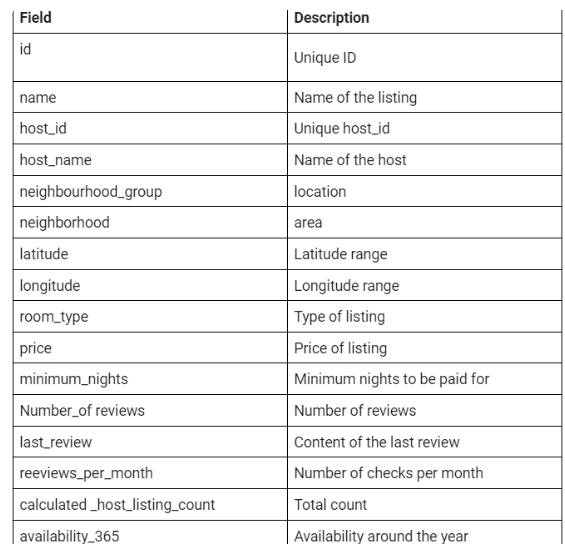

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [ ]:
# Load Dataset
file_path = '/content/drive/MyDrive/Airbnb NYC 2019.csv'
df = pd.read_csv(file_path)

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(48895, 16)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().value_counts()

,count
False,48895


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


<Axes: >

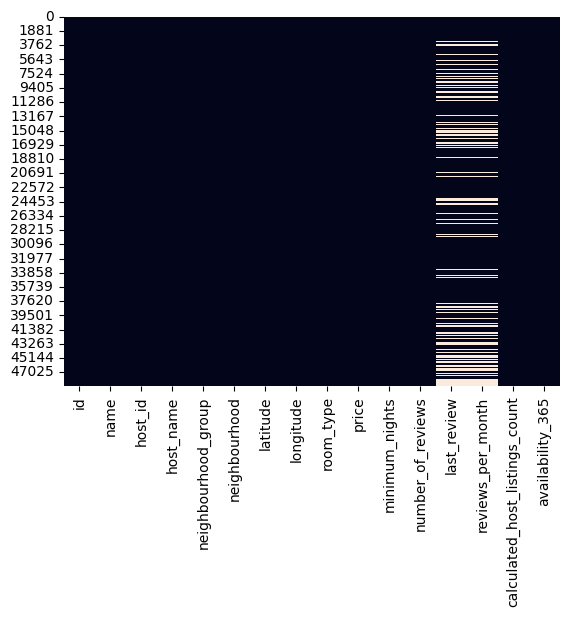

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

There are 16 columns and 48895 rows in the data. All columns are non null. All rows are unique with no duplicates

For null values: 4 columns -> name, hostname, last_review and reviews_per_month has null values.

last_review and reviews_per_month has 10052 null values which is 20.5% of data.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Variables Description

**id**: ID of the property

**name** : name of room/property

**host_name** : name of host

**host_id** : ID of the host

**neighbourhood_group** : neighbourhood groups in the city

**neighbourhood** : neighbourhoods inside the neighbourhood groups

**latitude** : location value -> latitude

**longitude** : location value -> longitude

**price** : price of the room/property

**room_type** : Type of room

**minimum_nights** : minimum nights stayed at that airbnb

**number_of_reviews** : total number of reviews for that room/property

**last_review** : date of last review

**reviews_per_month** : reviews per month for that room/property

**calculated_hotlisting_count** : number of hostlistings

**availability_365** : number of days room/property is available for booking in a year

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for var in df.columns:
  print(f'{var} , unique values:  {df[var].nunique()}')
  print()

id , unique values:  48895

name , unique values:  47905

host_id , unique values:  37457

host_name , unique values:  11452

neighbourhood_group , unique values:  5

neighbourhood , unique values:  221

latitude , unique values:  19048

longitude , unique values:  14718

room_type , unique values:  3

price , unique values:  674

minimum_nights , unique values:  109

number_of_reviews , unique values:  394

last_review , unique values:  1764

reviews_per_month , unique values:  937

calculated_host_listings_count , unique values:  47

availability_365 , unique values:  366



## 3. ***Data Wrangling***

### Data Wrangling Code

### Handling Null Values

In [ ]:
# Write your code to make your dataset analysis ready.
total_val = df.shape[0]
df_null = pd.DataFrame(df.isnull().sum()).reset_index()
df_null.rename(columns={'index':'columns',0:'percentage null'},inplace=True)
df_null['percentage null'] = df_null['percentage null'].apply(lambda x: round(x*100/total_val,2))
df_null

,columns,percentage null
0,id,0.00
1,name,0.03
2,host_id,0.00
3,host_name,0.04
4,neighbourhood_group,0.00
5,neighbourhood,0.00
6,latitude,0.00
7,longitude,0.00
8,room_type,0.00
9,price,0.00


Here, we have created a new dataframe from the isnull().sum() output.

In the new dataframe, 2nd column is converted to percentage null by dividing it by total values: 48895

Columns containing null values are :
1. name
2. host_name
3. last_review
4. reviews_per_month

name and hostname has very less null values whereas last review and review per month column has significant null values of around 20.5%

In [ ]:
df[df['number_of_reviews']==0].head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365
193,51438,1 Bedroom in 2 Bdrm Apt- Upper East,236421,Jessica,Manhattan,Upper East Side,40.77333,-73.95199,Private room,130,14,0,NaN,NaN,2,0
204,54466,Beautiful Uptown Manhattan apartmnt,253385,Douglas,Manhattan,Harlem,40.80234,-73.95603,Private room,200,30,0,NaN,NaN,1,365
260,63588,LL3,295128,Carol Gloria,Bronx,Clason Point,40.81309,-73.85514,Private room,90,2,0,NaN,NaN,7,349
265,63913,"HOSTING YOUR SUNNY, SPACIOUS NYC ROOM",312288,Paula,Manhattan,Inwood,40.86648,-73.92630,Private room,75,7,0,NaN,NaN,2,323
267,64015,Prime East Village 1 Bedroom,146944,David,Manhattan,East Village,40.72807,-73.98594,Entire home/apt,200,3,0,NaN,NaN,1,0


In [ ]:
df[df['last_review'].isna()]['number_of_reviews'].value_counts()

,count
number_of_reviews,
0,10052


In [ ]:
df[df['reviews_per_month'].isna()]['number_of_reviews'].value_counts()

,count
number_of_reviews,
0,10052


We can clearly see that for column last_review and reviews_per_month has null values when number_of_reviews are 0. Hence for dealing with that, filling na values for reviews_per_month with 0 and dropping last_review column

In [ ]:
df2 = df.copy()
df2['reviews_per_month'].fillna(0,inplace=True)
df2.drop('last_review',axis=1, inplace=True)
df2.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


As name and host_name has very low number of null values compared to total values. We can just drop the rows with null values

In [ ]:
df2 = df2[~df2['host_name'].isna()]
df2 = df2[~df2['name'].isna()]
df2.shape

(48858, 15)

In [ ]:
df2.isnull().sum()

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


### Analyzing Columns

Analyzing values in price columns

In [ ]:
df['price'].describe()

,price
count,48895.000000
mean,152.720687
std,240.154170
min,0.000000
25%,69.000000
50%,106.000000
75%,175.000000
max,10000.000000


Minimum value for price is 0. Properties cannot have price 0. Hence we need to remove those rows

In [ ]:
df2[df2['price']==0].count()

,0
id,11
name,11
host_id,11
host_name,11
neighbourhood_group,11
neighbourhood,11
latitude,11
longitude,11
room_type,11
price,11


In [ ]:
df2.shape

(48858, 15)

In [ ]:
df3 = df2[df2['price']!=0]
df3.shape

(48847, 15)

Similary checking availability_365 column

In [ ]:
df3['availability_365'].describe()

,availability_365
count,48847.000000
mean,112.799599
std,131.615947
min,0.000000
25%,0.000000
50%,45.000000
75%,227.000000
max,365.000000


Here the min value is 0 as well. The rooms cannot be available 0 days hence removing those values

In [ ]:
df3.shape

(48847, 15)

In [ ]:
df3 = df3[df3['availability_365']!=0]
df3.shape

(31342, 15)

Dropping other columns that are not required

In [ ]:
df3.drop(['id','host_id'],axis=1,inplace=True)
df3.columns

<ipython-input-29-f434af7070a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop(['id','host_id'],axis=1,inplace=True)


Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [ ]:
df3.head()

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
5,Large Cozy 1 BR Apartment In Midtown East,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129


### What all manipulations have you done and insights you found?



1. Firstly we have handled the null values.

  For reviews_per_month null values existed because the number of reviews were 0, so we have filled those null values with 0.
  
  Name and host_name had very little null values when compared to total values, therefore we have dropped those records.

2. We have dropped unneccassary columns such has id, host_id and last_review from the dataframe

3. In price column we saw that the min value is 0 for 11 records, so we dropped those particular records from the dataframe as price of an airbnb cannot be 0.

4. Similarly for availability_365 column we removed 0 values as room cannot be available for 0 days



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<Axes: xlabel='neighbourhood_group'>

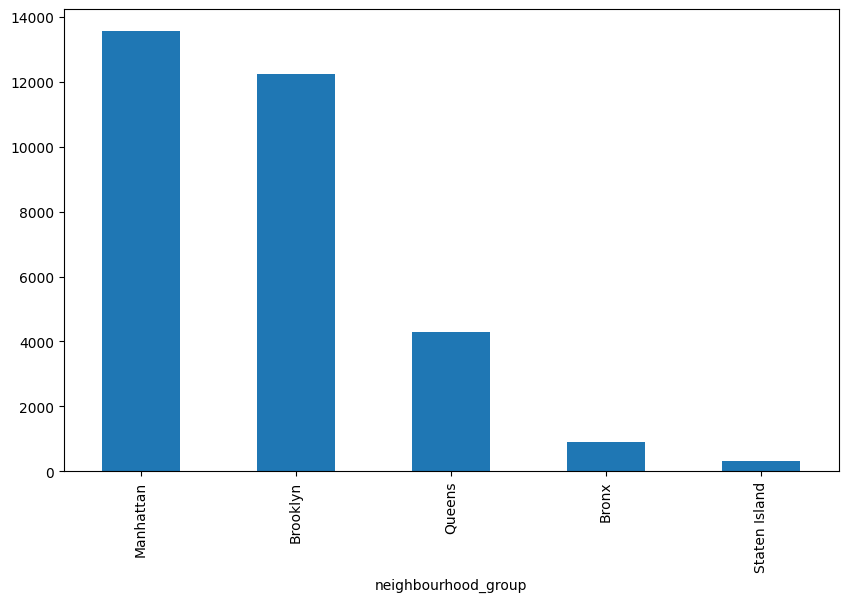

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(10,6))
df3['neighbourhood_group'].value_counts().plot(kind='bar')

From here we can see that Manhattan has the most number of rooms/properties followed by Brookyln.

There is a sharp decline in the other 3 which tells that most people prefer to stay in an airbnb in Manhattan or Brookyln.

From this insight we can see the areas in the city which airbnb should be focusing on.

The negative insight can be that visitors are not going into the other 3 neighbourhoods as compared to Manhattan and Brooklyn

#### Chart - 2

<Axes: xlabel='room_type'>

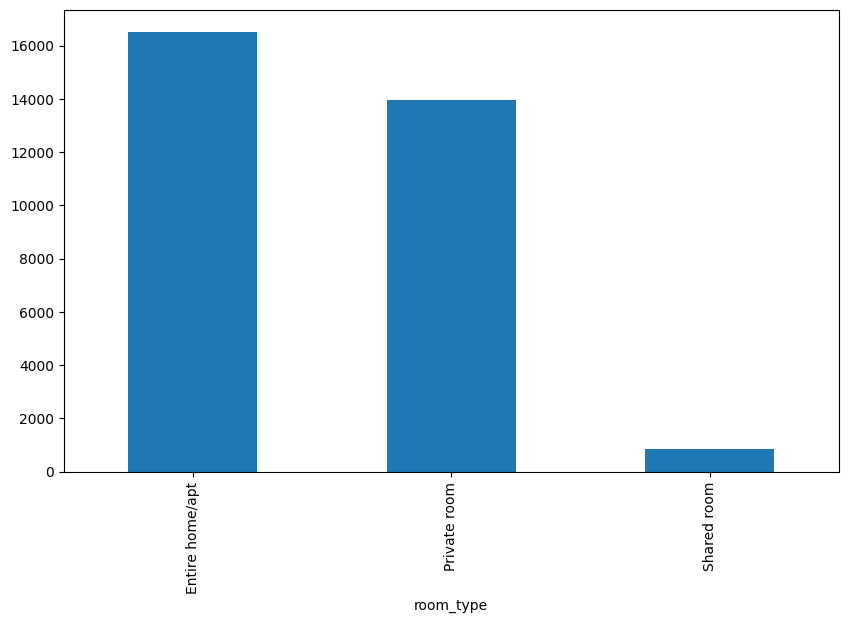

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(10,6))
df3['room_type'].value_counts().plot(kind='bar')

People booking airbnb prefer privacy as the demand for entire room/apartment and private rooms are much higher than shared rooms. So airbnb should focus more on such properties.

#### Chart - 3

<Axes: xlabel='neighbourhood_group', ylabel='availability_365'>

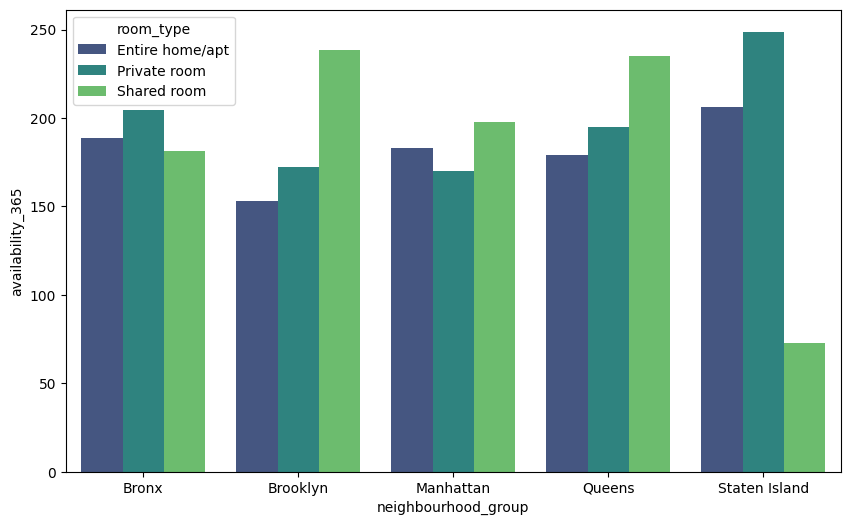

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(10,6))
df_nrt = df3.groupby(['neighbourhood_group','room_type'])['availability_365'].mean().reset_index()
sns.barplot(df_nrt,x='neighbourhood_group',y='availability_365',hue='room_type',palette='viridis')

1. Shared rooms are available more days on an average then others for 4 neighbourhood groups.
2. Private rooms availability is less in Brooklyn and Manhattan than the other 3 neighbourhood groups.

We can increase the average availability of private rooms in Manhattan and Brooklyn as they have the most property listings and see most visitor traffic.

Shared rooms have the most availability in all room types but they have the least demand, hence hosts may see a very less ROI for their shared rooms.


#### Chart - 4

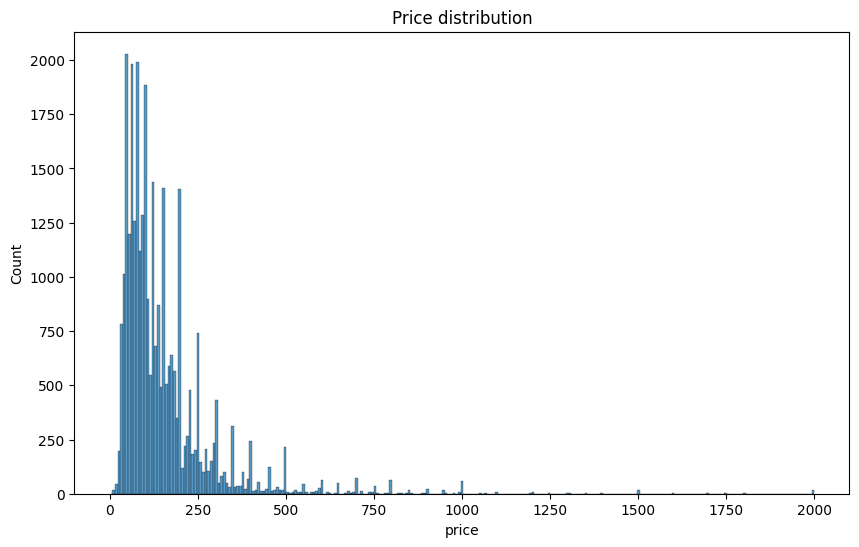

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(10,6))
sns.histplot(df3['price'],binrange=[0,2000])
plt.title("Price distribution")
plt.show()

Most of the rooms have price in range 0 to 500

From here we can see that most visitors booking airbnb prefer to spend <=$500 on a room. So airbnb should focus more on that segment of customers.

#### Chart - 5

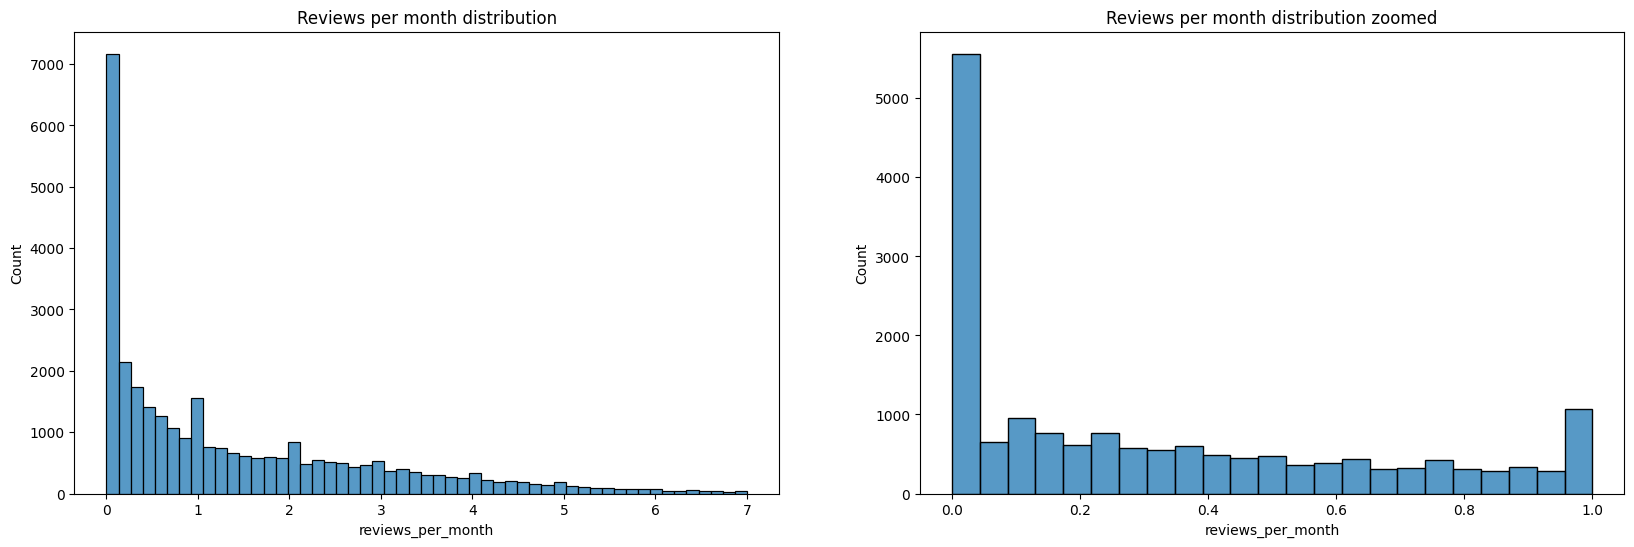

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.histplot(df3['reviews_per_month'],binrange=[0,7])
plt.title("Reviews per month distribution")

plt.subplot(1,2,2)
sns.histplot(df3['reviews_per_month'],binrange=[0,1])
plt.title("Reviews per month distribution zoomed")
plt.show()


This histogram shows reviews per month distribution for properties

Most of the properties are getting close to 0 reviews per month or are not reviewed at all

This has a negative impact as visitors are more likely to book a place which has reviews on it. As reviews tells a lot about the place and the experience it provides.

#### Chart - 6

<ipython-input-36-f95752577520>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df_host,x=df_host_top['host_name'],y=df_host_top['reviews_per_month'],palette='rocket')


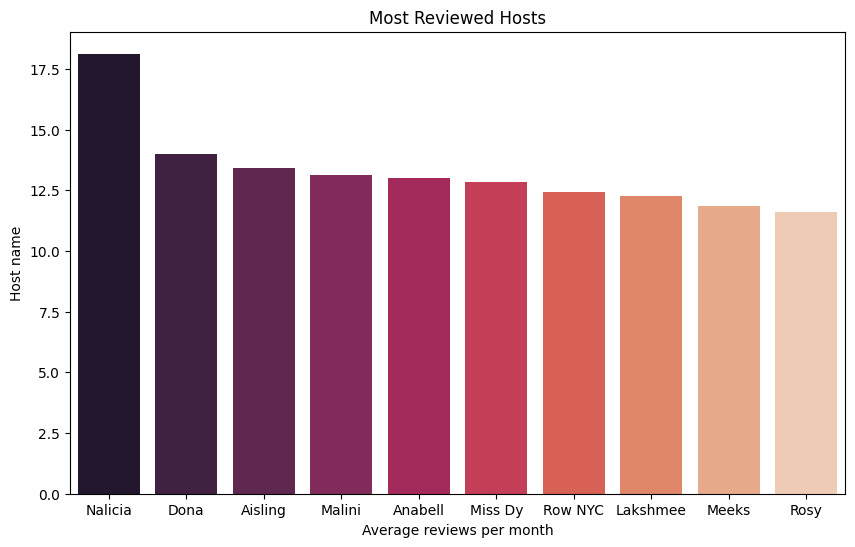

In [ ]:
# Chart - 6 visualization code
df_host = df3.groupby('host_name')[['reviews_per_month']].mean().reset_index()

df_host.sort_values('reviews_per_month',axis=0,inplace=True,ascending=False)
df_host_top = df_host.head(10)

plt.figure(figsize=(10,6))
sns.barplot(df_host,x=df_host_top['host_name'],y=df_host_top['reviews_per_month'],palette='rocket')
plt.title("Most Reviewed Hosts")
plt.xlabel("Average reviews per month")
plt.ylabel("Host name")
plt.show()

The bar chart shows the top 10 reviewed hosts based on average reviews per month

Nalicia is the host who is getting the most reviews per month on an average. More visitors are coming to properties hosted by Nalicia then others

As Airbnb experience highly depends on the host of the property as well, the hosts which are getting reviewed the most monthly are experiencing more traffic of visitors.

People listing their room/property can learn from the most reviewed hosts around the city and increase visitor traffic to them as well.

#### Chart - 7

<ipython-input-37-2aad31d4d952>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df_rt,x='room_type',y='minimum_nights',palette='viridis')


Text(0.5, 1.0, 'Average number of nights people stay in each room')

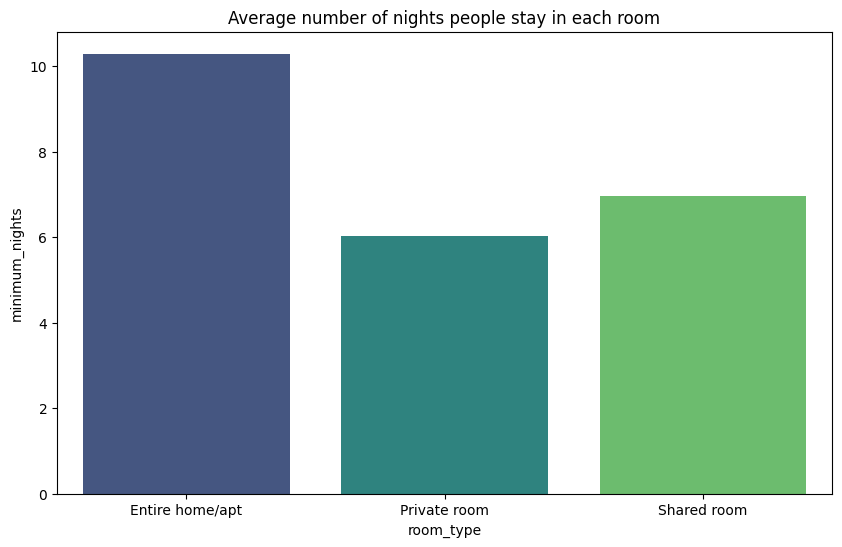

In [ ]:
# Chart - 7 visualization code
df_rt = df3.groupby('room_type')['minimum_nights'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(df_rt,x='room_type',y='minimum_nights',palette='viridis')
plt.title("Average number of nights people stay in each room")

The bar chart shows average number of nights people stay in each room

1. People usually stay more than 10 nights in an apartment, while they stay close to 6 in private and shared rooms.

2. Althought the demand for shared rooms is very less than private rooms, people on an average are staying longer in shared rooms then private rooms.

1. People on an average are staying more in shared rooms. As the number of shared rooms across the city are very less, we can increase number of shared rooms to increase revenue.

2. As price of entire room/apartment is the highest, people prefer to stay longer on an average 10 nights. Hence, it generates most revenue.

#### Chart - 9

<Axes: xlabel='neighbourhood_group', ylabel='price'>

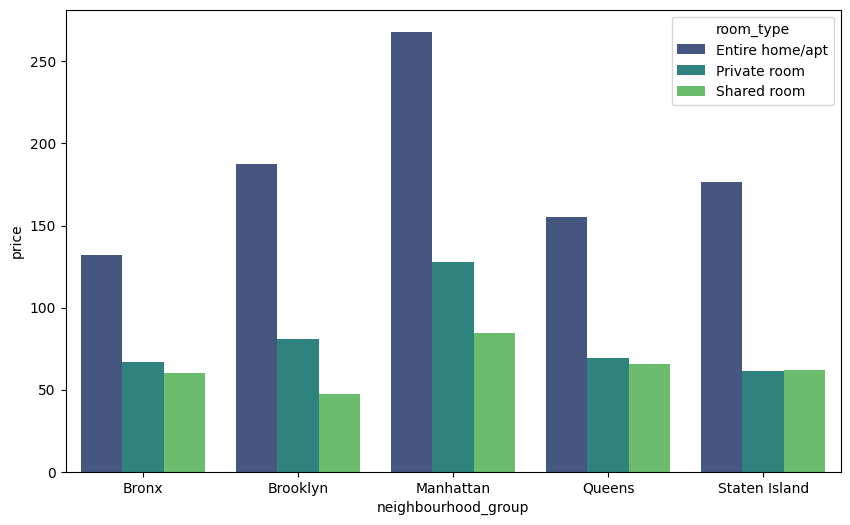

In [ ]:
# Chart - 10 visualization code
plt.figure(figsize=(10,6))
df_nrt = df3.groupby(['neighbourhood_group','room_type'])['price'].mean().reset_index()
sns.barplot(df_nrt,x='neighbourhood_group',y='price',hue='room_type',palette='viridis')

The barplot shows the price of different rooms for all neighbourhood groups.

1. Manhattan and Brookyln has the highest average price for entire apartment and private rooms.
2. Shared room price is almost similar in all neighbourhood groups.
3. Staten Island has the similar apartment price as brooklyn but less people prefer to go there.

Manhattan and Brooklyn are the most expensive neighbourhoods and the demand is very high there as well.

Negative business impact from this can be that even though very few people are visiting Staten Island, their average price for apartment is similar to Brooklyn which makes it even more undesirable for a visitor.

#### Chart - 10

Text(0.5, 1.0, 'Neighbourhood group distribution')

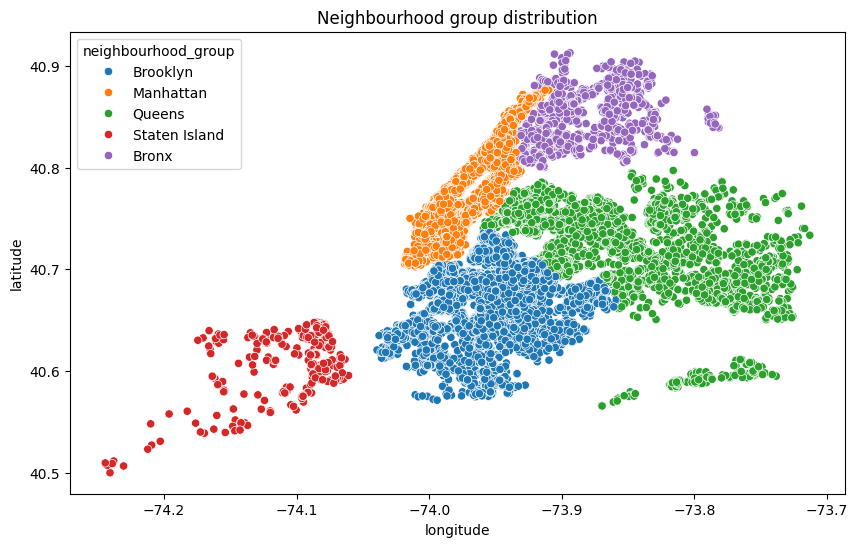

In [ ]:
# Chart - 11 visualization code
plt.figure(figsize=(10,6))
sns.scatterplot(df3,x='longitude',y='latitude',hue='neighbourhood_group')
plt.title("Neighbourhood group distribution")

The above scatterplot shows the latitude and longitude for different neighbourhood groups

1. Brooklyn and Manhattan have very central location and also the highest traffic of visitors.
2. Bronx is very high up north in the city, and one needs to commute longer to reach there on an average.
3. Staten Island is an island, hence it is not directly connected by the other neighbourhood groups. This can be a reason of it having very less visitors.

Location plays a very important part for a tourist/visitor while deciding to book an airbnb.People usually prefer a central location which saves their time. This is the reason we have most listings and traffic in Brooklyn and Manhattan.

Staten Island is disconnected with the rest of the neighbourhood groups and its location is a big disadvantage hence it sees less traffic of visitors.

#### Chart - 11

Text(0.5, 1.0, 'Room type distribution')

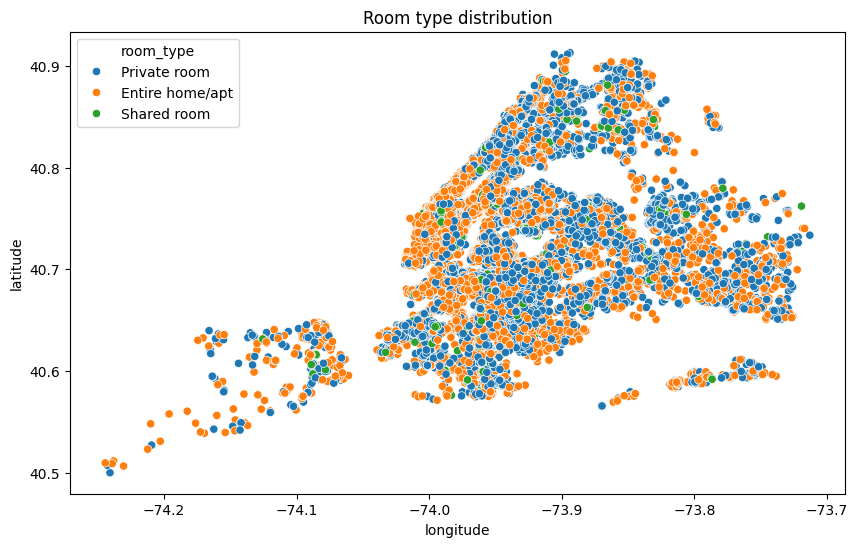

In [ ]:
# Chart - 12 visualization code
plt.figure(figsize=(10,6))
sns.scatterplot(df3,x='longitude',y='latitude',hue='room_type')
plt.title("Room type distribution")

The scatterplot shows the distribution of roomtypes across the city based on location.

1. Private rooms and Entire room/apt are evenly spread across the city. Shared rooms are less visible because of its low numbers.
2. Majority of entire room/apt are in Manhattan while you see a mix in other neighbourhood groups.

As demand of entire room/apartment is very high. Other neighbourhood groups can provide less expensive options to drive traffic off Manhattan.

#### Chart - 12

Text(0.5, 1.0, 'Room type distribution')

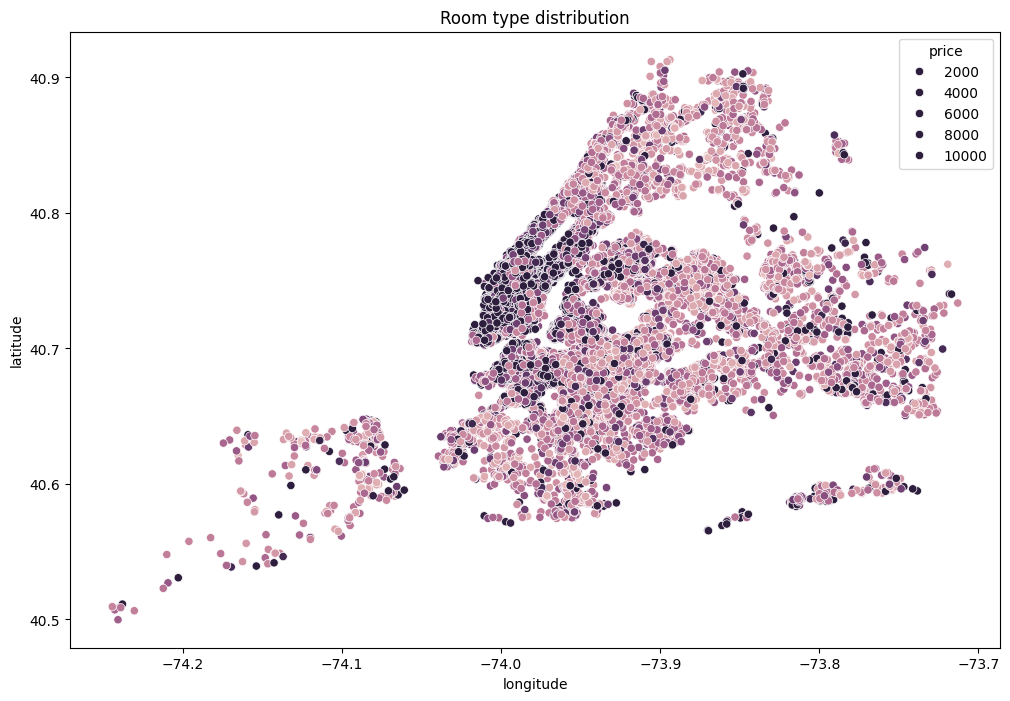

In [ ]:
# Chart - 13 visualization code
plt.figure(figsize=(12,8))
sns.scatterplot(df3,x='longitude',y='latitude',hue='price',hue_norm=(0,200))
plt.title("Room type distribution")

This scatter plot shows the price of properties based on location.

1. Most expensive rooms/properties are in Manhattan and Northern Brooklyn given their central location.
2. As we move further away from the centre of the city, the room prices are decreasing.

People prefer the central location of the city due to various factors such as travel time, vicinity to better restaurants, shopping areas and tourist attractions.

As the centres are very expensive due to high demand, the neighbouring areas to the centre of the city can leverage this situation to provide less expensive rooms and good facilities such as public transport, restaurant, shopping malls to attract large number of people,

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?


1. Expand Listings in Outer Boroughs: Increase room availability in Queens, Bronx, and Staten Island to balance the distribution of Airbnb accommodations across the city.

2. Capitalize on Privacy Preference: Focus on marketing entire apartments and private rooms, as these are in high demand due to guests' preference for privacy.

3. Optimize Room Availability: Boost the availability of private rooms in Manhattan and Brooklyn to meet demand; reduce shared room availability as they are less popular.

4. Target $500 Price Range:
Improve guest experience for accommodations priced under  $500 to capture the majority of bookings.

5. Enhance Review System: Encourage guests to leave reviews, as properties with more reviews are more likely to be booked.

6. Celebrate Top Hosts: Recognize and reward top-performing hosts like Nalicia to set benchmarks and inspire others.

7. Promote Diverse Pricing: Highlight the varied price ranges in Manhattan and Brooklyn to attract different visitor segments, and encourage other neighborhoods to diversify their offerings.

8. Maximize Revenue from Apartments: Since apartments generate the most revenue, ensure they are well-maintained. Improving the experience of shared rooms could also increase their revenue potential.

9. Analyze High-End Areas: Study successful high-rent areas like Vinegar Hill to replicate their appeal in other parts of the city.

10. Attract Visitors to Outer Boroughs: Lower the prices of entire apartments in Queens, Bronx, and Staten Island to draw more visitors.

11. Improve Outer Borough Infrastructure: Invest in better transportation, entertainment, and facilities in outer boroughs to make them more attractive to visitors.

12. Reduce Manhattan Overload: Encourage visitors to explore other neighborhoods by offering competitive pricing, efficient transport, and similar amenities.








# **Conclusion**

Here are the key points summarized:

# Entire Apartment:

1. Most preferable accommodation type.
2. Generates the highest revenue.
3.Predominantly available and preferred in Manhattan and Brooklyn.
4. Other neighborhoods can attract guests by offering cheaper entire apartments.
Private Rooms:

# Second most preferred after entire apartments.
1. Brooklyn and Manhattan experience the highest demand.
2. Increasing availability in these areas could boost revenue.
#Shared Rooms:

1. Least preferred accommodation type.
2. Hosts should reduce availability to match lower demand and increase revenue.
3. Enhancing guest experience may lead to more bookings and higher revenue.
# City Recommendations:

Improve transportation efficiency and extend operating hours for better connectivity from Queens, Bronx, and Staten Island to Brooklyn and Manhattan.
Reduce commercial taxes in less visited areas to encourage more restaurants and shopping centers.
# Conclusion:

The Airbnb Booking Analysis revealed trends to help hosts optimize pricing and marketing strategies.
Insights on Airbnb’s economic impact can guide policies for a fair housing market and support the hospitality sector's growth.
These findings can enhance the Airbnb brand and solidify its leadership in the hospitality industry.







####End of Project